In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Load the dataset
data = pd.read_csv("weather.csv")

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.tail()


,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
#Check for null values
data.isnull().sum()


,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.columns


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
data.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5


In [ ]:
data['weather'].value_counts()


,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


<ipython-input-20-9694a1d1b782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")


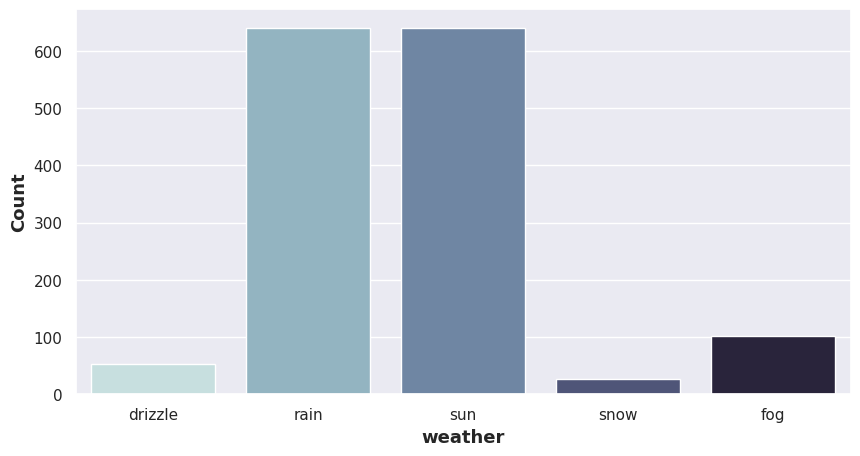

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()


In [ ]:
import plotly.express as px


In [ ]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_max',
       title = 'Variation of Maximum Temperature')

In [ ]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_min',
       title = 'Variation of Minimum Temperature')

In [ ]:
px.line(data_frame = data,
       x = 'date',
       y = 'wind',
       title = 'Variation of Wind on different dates')

<Figure size 1400x800 with 0 Axes>

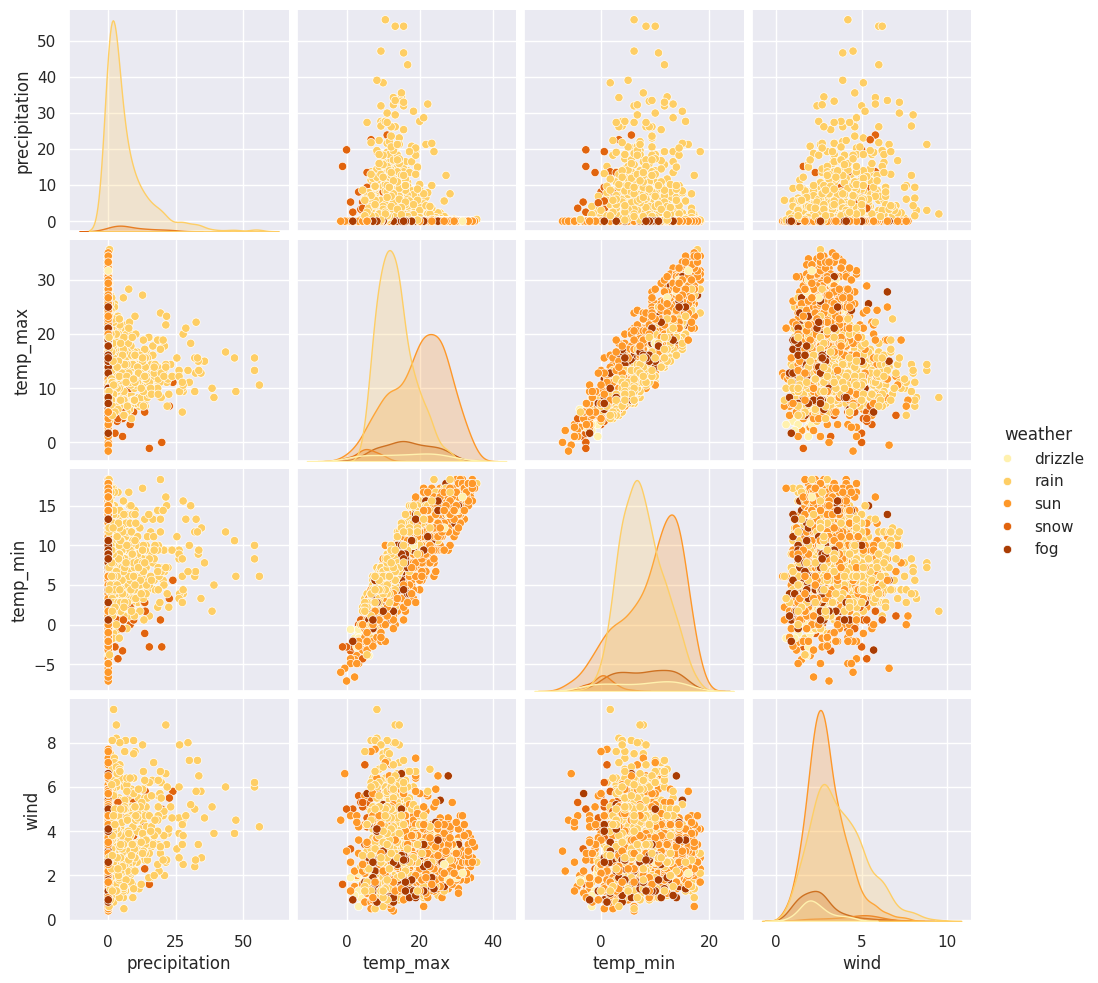

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()


<ipython-input-26-81ef34806897>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x500 with 0 Axes>

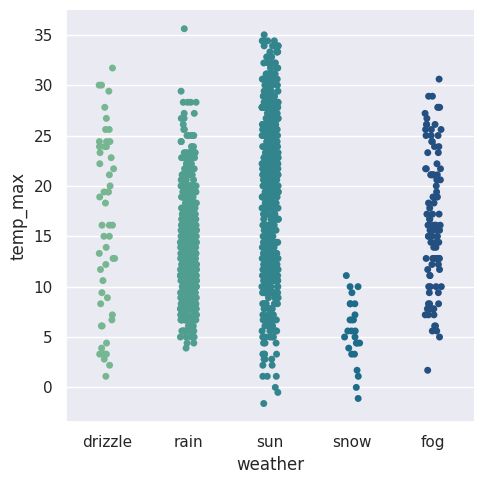

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()


<ipython-input-27-926398945034>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x500 with 0 Axes>

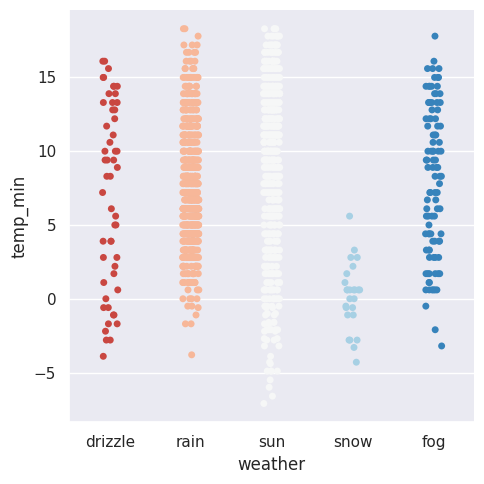

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
plt.show()

In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")


In [ ]:
data = data.drop('date',axis=1)

In [ ]:
x = data.drop('weather',axis=1)
y = data['weather']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

Accuracy score: 0.7622950819672131


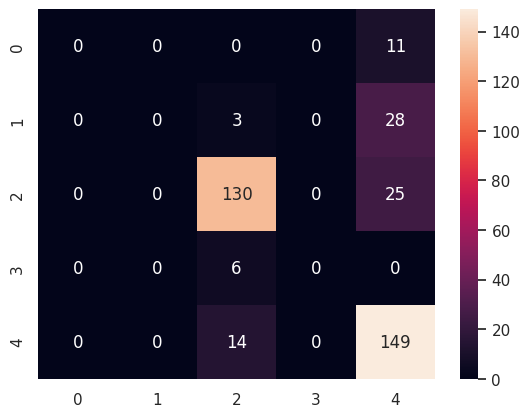

In [ ]:
sns.heatmap(cm,annot=True, fmt = '.3g')
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# **Predictions**

In [ ]:
y_pred = classifier.predict(X_test)

Accuracy Score 0.7950819672131147


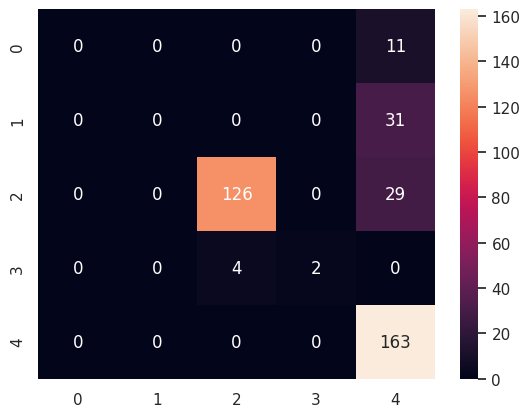

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '0.3g')
print("Accuracy Score" ,accuracy_score(y_test, y_pred))

# Naive **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

Accuracy score : 0.8415300546448088


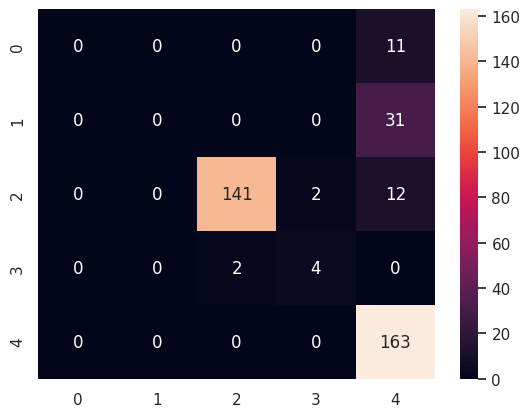

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc}")